In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (
    ModelSpec as MS,
    summarize,
    poly
)

In [3]:
Boston = load_data("Boston")

In [9]:
X = pd.DataFrame({
    "intercept": np.ones(len(Boston)),
    "lstat": Boston["lstat"]
}).astype({
    "intercept": "float32",
    "lstat": "float32"
})
y = Boston["medv"].astype("float32")

In [10]:
model = sm.OLS(y, X)
results_linear = model.fit()

In [11]:
type(model), type(results_linear)

(statsmodels.regression.linear_model.OLS,
 statsmodels.regression.linear_model.RegressionResultsWrapper)

In [12]:
summarize(results_linear)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [17]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [13]:
results_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           5.08e-88
Time:                        10:46:07   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
results_linear.params

intercept    34.553841
lstat        -0.950049
dtype: float32

In [18]:
new_df = pd.DataFrame({"lstat": [5, 10, 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [19]:
new_predictions = results_linear.get_prediction(newX)

In [20]:
new_predictions.predicted_mean

array([29.80359364, 25.05334663, 20.30309963])

In [21]:
new_predictions.conf_int(alpha = 0.05)

array([[29.00741155, 30.59977573],
       [24.47413137, 25.63256189],
       [19.73158726, 20.874612  ]])

In [22]:
new_predictions.conf_int(obs = True, alpha = 0.05)

array([[17.56567449, 42.04151278],
       [12.82762582, 37.27906745],
       [ 8.07774133, 32.52845793]])

In [45]:
def abline(ax, b, m, *args, **kwargs):
    """
    Add a line with slope m and intercept b to the plot ax.
    """
    xlim = ax.get_xlim()
    ylim = [xlim[0]*m + b, xlim[1]*m + b]

    ax.plot(xlim, ylim, *args, **kwargs)

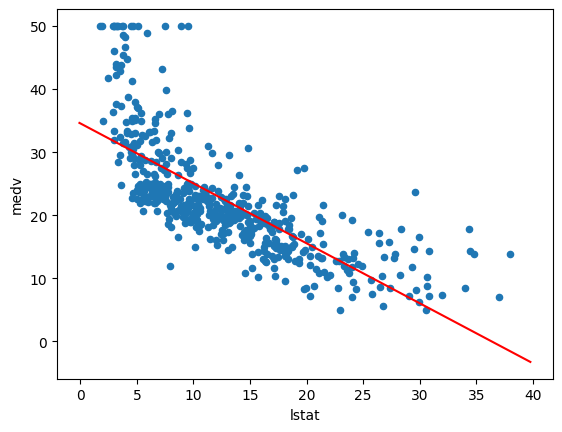

In [ ]:
ax = Boston.plot.scatter(x = "lstat", y = "medv")
abline(ax, results_linear.params["intercept"], results_linear.params["lstat"], color = "red")

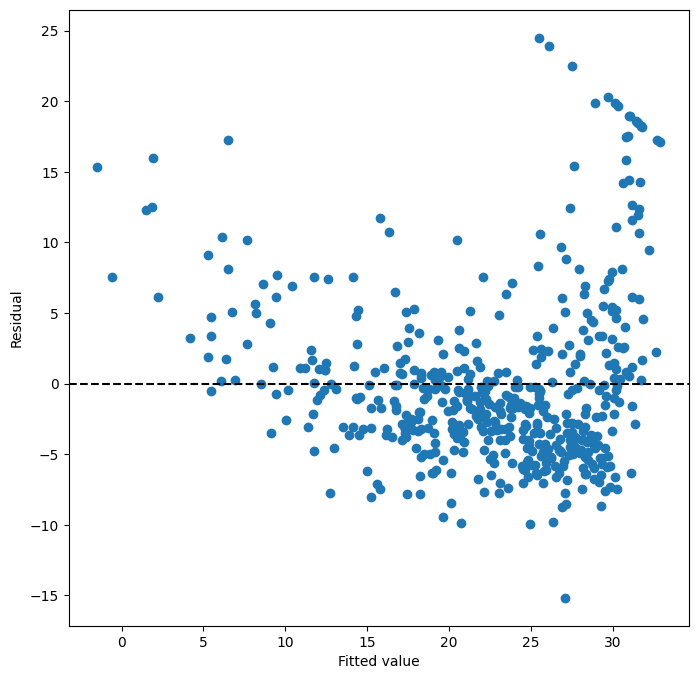

In [ ]:
ax = plt.subplots(figsize = (8, 8))[1]

ax.scatter(results_linear.fittedvalues, results_linear.resid)
ax.set_xlabel("Fitted value")
ax.set_ylabel("Residual")
ax.axhline(0, c = 'k', ls = '--')

374

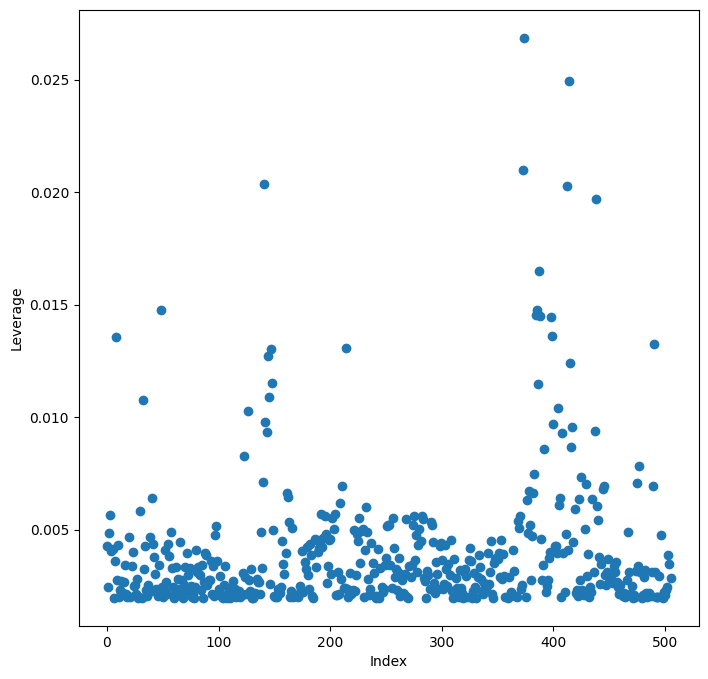

In [ ]:
# what is leverage statistics?

infl = results_linear.get_influence()
ax = plt.subplots(figsize = (8, 8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage")
np.argmax(infl.hat_matrix_diag)

***

In [54]:
X = MS(Boston.columns.drop('medv')).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [55]:
X = MS(Boston.columns.drop(['medv', 'age'])).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


In [5]:
X = MS([
    'lstat',
    'age',
    ('lstat', 'age')
]).fit_transform(Boston)
model = sm.OLS(y, X)


In [6]:
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


In [37]:
X = MS([poly('lstat', degree = 2), 'age']).fit_transform(Boston)
model = sm.OLS(y, X)
results_qdtc = model.fit()
summarize(results_qdtc)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [38]:
anova_lm(results_linear, results_qdtc)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.380859,0.0,NaN,NaN,NaN
1,502.0,14165.613194,2.0,5306.767665,94.030429,2.069651e-35


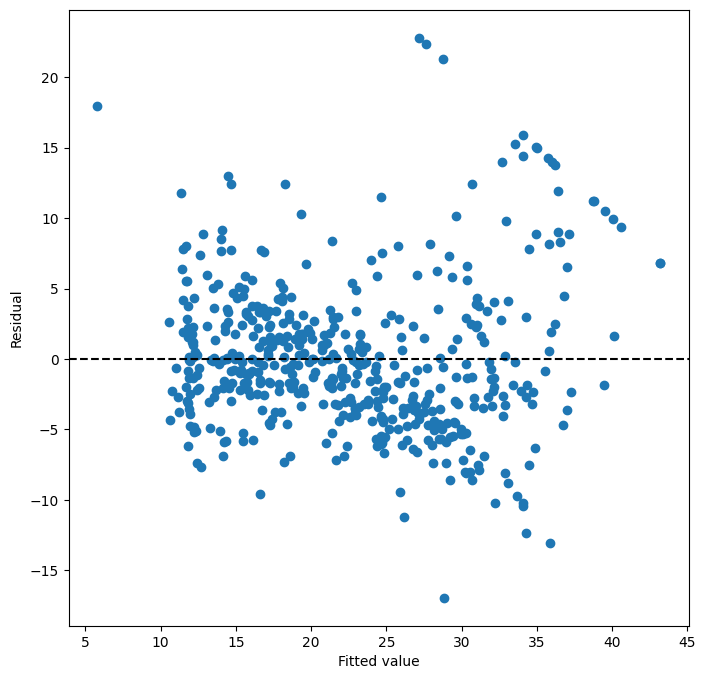

In [39]:
ax = plt.subplots(figsize = (8, 8))[1]
ax.scatter(results_qdtc.fittedvalues, results_qdtc.resid)
ax.set_xlabel("Fitted value")
ax.set_ylabel("Residual")
ax.axhline(0, c = 'k', ls = '--')

***